In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [155]:
USER_START=1
USER_END=11
BASEPATH = "/Users/thl/Developer/thesis/result"
PATTERN = ["burst", "stable"][0]
ENTRY = ["single", "multiple"][0]
ARRIVAL = ["slope", "spike"][0]
FUNCTION_NAME = ["fpo-sine"][0]
ARCH_LIST = ["Centralized", "Federated", "Decentralized"]
IP_MAP = {
    "10.202.0.1": "145.100.135.86", 
    "10.202.0.2": "145.100.135.99", 
    "10.202.0.3": "192.168.100.105", 
    "10.202.0.4": "192.168.100.102", 
    "10.202.0.5": "192.168.100.103", 
    "10.202.0.6": "192.168.100.111"
}
HOSTNAME_IP_MAP = {
    "EdgeNode1 LocA": "192.168.100.105", 
    "EdgeNode2 LocA": "192.168.100.102",  
    "EdgeNode1 LocB": "192.168.100.103", 
    "EdgeNode2 LocB": "192.168.100.111", 
    "CloudNode1": "145.100.135.86", 
    "CloudNode2": "145.100.135.99"
}

In [156]:
# set theme
sns.set_theme(
    context="paper",
    style="whitegrid",
)
palette = sns.color_palette("BrBG", 6, 1)
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"]
    }
)

In [157]:
def get_resptime_dataframe():
    dirpath = f"{BASEPATH}/{PATTERN}/{ENTRY}/{ARRIVAL}/{FUNCTION_NAME}"
#     target_col_name = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
    target_col_name = ["Total Average Response Time"]
#     target_col_name = ["Total Max Response Time"]
    user_count_list = [i for i in range(USER_START, USER_END + 1)]
    df_plot_resptime = pd.DataFrame(columns = ["Response Time", "User Count"])
    for user_cnt in user_count_list:
        for arch in ARCH_LIST:
            df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_stats_history.csv")
            df = df[target_col_name].iloc[[-1],:]
            df.index = ["Response Time"]
            df = df.transpose().reset_index(drop = True)
            df["User Count"] = user_cnt
            df["Architecture"] = arch
            df_plot_resptime = pd.concat((df_plot_resptime, df))
    return df_plot_resptime


In [176]:
def plot_resptime_dataframe_bar(df_plot_resptime, y_name):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=df_plot_resptime, 
        x="User Count", 
        y=y_name, 
        hue="Architecture",
        # errorbar="sd",
        linestyle='', dodge=.5, capsize=.1)

    
    ax.set_title(f"{y_name}", fontsize="12")
    ax.set_xlabel('Concurrent User', fontsize="12")
    ax.set_ylabel(f"{y_name} (ms)", fontsize="12")
    
    ax.margins(y=0.15)
    sns.move_legend(ax, "upper left", ncols=len(ARCH_LIST), fontsize="12", frameon=True, title=None)
    
    plt.show()

In [177]:
def plot_resptime_dataframe_line(df_plot_resptime, y_name):
    plt.figure(figsize=(10, 5))
    ax = sns.pointplot(
        data=df_plot_resptime, 
        x="User Count", 
        y=y_name, 
        hue="Architecture",
        linestyle='-', 
#         dodge=.2, 
        capsize=.1,
        marker=".", markersize=5, 
        markeredgewidth=3)
    
    ax.set_title(f"{y_name}", fontsize="12")
    ax.set_xlabel('Concurrent User', fontsize="12")
    ax.set_ylabel(f"{y_name} (ms)", fontsize="12")
    
    ax.margins(y=0.15)
    sns.move_legend(ax, "upper left", ncols=len(ARCH_LIST), fontsize="12", frameon=True, title=None)
    plt.show()

In [178]:
df = get_resptime_dataframe()

/var/folders/1y/c37lmtr53c92dcdgqfyzl59w0000gn/T/ipykernel_73104/1927268244.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plot_resptime = pd.concat((df_plot_resptime, df))


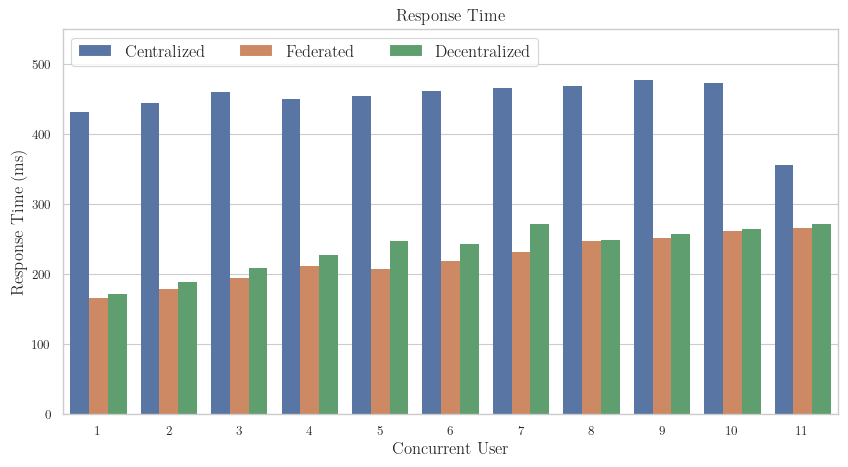

In [179]:
plot_resptime_dataframe_bar(df, y_name = "Response Time")

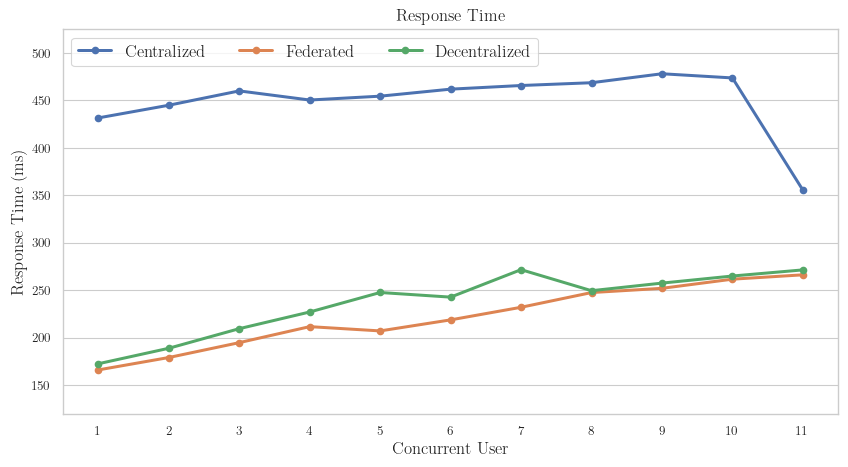

In [180]:
plot_resptime_dataframe_line(df, y_name = "Response Time")

In [181]:
def get_invocation_dataframe():
    dirpath = f"{BASEPATH}/{PATTERN}/{ENTRY}/{ARRIVAL}/{FUNCTION_NAME}"
#     target_col_name = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
    target_col_name = ["Request Count"]
#     target_col_name = ["Total Max Response Time"]
    user_count_list = [i for i in range(USER_START, USER_END + 1)]
    df_plot_resptime = pd.DataFrame(columns = ["Request Count", "User Count"])
    for user_cnt in user_count_list:
        for arch in ARCH_LIST:
            df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_stats.csv")
            df = df[target_col_name].iloc[[-1],:]
            df.index = ["Request Count"]
            df = df.transpose().reset_index(drop = True)
            df["User Count"] = user_cnt
            df["Architecture"] = arch
            df_plot_resptime = pd.concat((df_plot_resptime, df))
    return df_plot_resptime


In [182]:
df = get_invocation_dataframe()

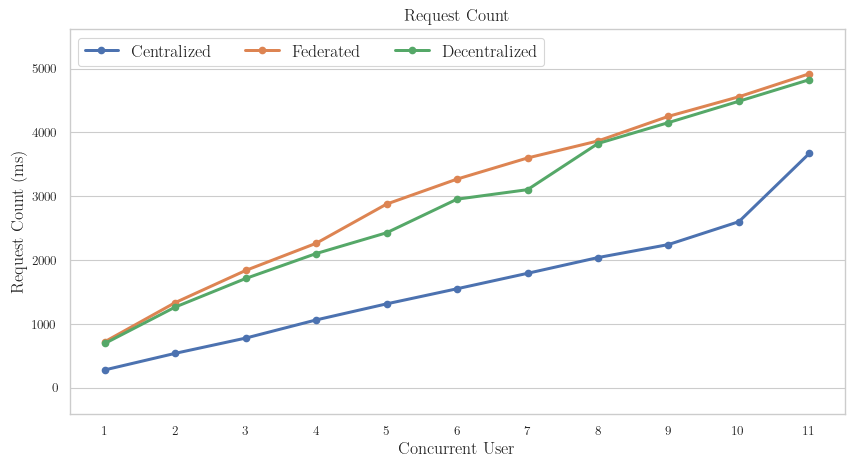

In [183]:
plot_resptime_dataframe_line(df, y_name = "Request Count")